# Programmation scientifique en python


Python devient de plus en plus une alternative à Matlab. 

Pourquoi ? 

   - gratuit 
   - "vrai" langage de programmation  
   - bénéficie de la communauté open source: en progression constante
   - unifie de nombreuses bibliothèques existant dans différents langages (algèbre, analyse, statistiques, traitement signal, etc)
   - librairie python pour "emballer" le tout: scipy, http://www.scipy.org/
   
   
   "Ten reasons Python rocks for science": https://www.stat.washington.edu/~hoytak/blog/whypython.html
   

On verra ici : 

   - le calcul matriciel avec numpy (base de nombreux autres outils)
   - (brièvement) une liste de quelques outils pertinents
       - traitement signal, traitement d'image
       - analyse de données, apprentissage automatique
       - graphes
       - ...
    

## Programmation vectorielle: numerical python (numpy)
--------------------------------------------------

introduction à la programmation scientifique et l'utilisation de vecteurs/matrices

  - définitions, créations
  - index/références
  - quelques opérations / exemples de calcul vectorisé 
  - règles de "broadcasting" (composition)
  - opérations + complexes, convolution (ex: automates cellulaires, fractales)
  
  

In [7]:
import numpy as np
a = np.random.random(1000)
print(type(a))

<class 'numpy.ndarray'>


In [10]:
print(a[:10]) 
 
print("-->",a.min(),a.max(),a.mean())

[ 0.68685987  0.82803395  0.65463549  0.69114804  0.00823295  0.07564877
  0.87953784  0.86834738  0.11623028  0.83057898]
--> 0.00338452026363 0.999007629784 0.511083336386


## Calcul vectorisé

In [12]:
from numpy import cos
c = cos(a)
print(c[:10])

[ 0.77324102  0.67632526  0.79326992  0.77051473  0.99996611  0.99714
  0.63750728  0.64608881  0.99325286  0.6744484 ]


In [13]:
(a+a)[:10]

array([ 1.37371973,  1.65606791,  1.30927098,  1.38229609,  0.0164659 ,
        0.15129755,  1.75907568,  1.73669476,  0.23246057,  1.66115795])

## Indexation et dimensions

In [32]:
c = np.array(a)
c = c.reshape(5,200)
print(c[0,9],a[9])
print()
print(c[:,2:4])

0.830578977063 0.830578977063

[[ 0.65463549  0.69114804]
 [ 0.66612196  0.52522879]
 [ 0.01000527  0.34932341]
 [ 0.12402031  0.42266058]
 [ 0.09977964  0.9705167 ]]


In [40]:
c[:,2:4].ravel()

array([ 0.65463549,  0.69114804, -1.        , -1.        ,  0.01000527,
        0.34932341,  0.12402031,  0.42266058,  0.09977964,  0.9705167 ])

## Création

In [41]:
c = np.arange(0.,1.,0.05) 
c

array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
        0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
        0.9 ,  0.95])

In [42]:
c = np.linspace(0,1.,21)
c

array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
        0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
        0.9 ,  0.95,  1.  ])

## Création (suite)

In [43]:
np.zeros((2,2))

array([[ 0.,  0.],
       [ 0.,  0.]])

In [44]:
np.ones((2,2))

array([[ 1.,  1.],
       [ 1.,  1.]])

In [45]:
np.eye(3)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

## Références 

attention aux références -> différent des listes

In [46]:
a = c[1:-1] 
c[1] = -1
print(a[:10])

[-1.    0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5 ]


In [47]:
c[0] = 0
a = np.zeros(c.shape)
# ou 
#a[:] = c
a[...] = c
c[0] = 2
print(a[:10])

[ 0.   -1.    0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45]


## Index Conditionnels

In [48]:
# version 1
ia1 = np.argwhere((a>.55) | (a<0.))

In [49]:
print(a[ia1].ravel())

[-1.    0.6   0.65  0.7   0.75  0.8   0.85  0.9   0.95  1.  ]


In [51]:
# Version 2
print(a[(a<0.) | (a>0.55)])

[-1.    0.6   0.65  0.7   0.75  0.8   0.85  0.9   0.95  1.  ]


## Exemple

Calculer l'approximation de $\pi$ avec la formule de Wallis: 
     $$ \pi = 2\prod_{i=1}^{\infty} \frac{4i^2}{4i^2-1}$$ 

In [59]:
import numpy as np

a = np.arange(10000)+1
b = 4.*a*a
c = b/(b-1.)
wallis = 2*np.cumprod(c)[-1]
print(wallis)

3.14151411868


## Exemple 

 Moyenne glissante

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


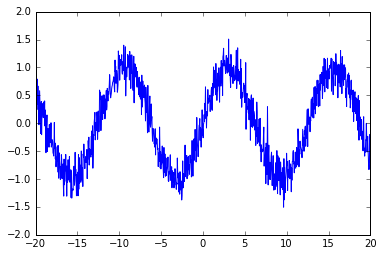

In [63]:
from numpy import sin
%pylab inline
x = np.linspace(-20,20,1000)
a = sin(x/2.) + np.random.normal(scale=0.2,size=1000)
figure = pylab.plot(x,a)

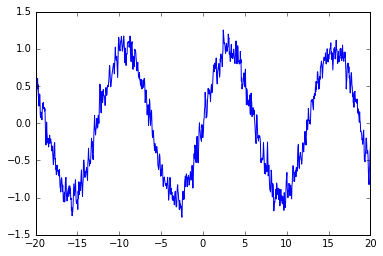

In [65]:
c = np.array(a)
c[1:-1] += a[:-2] + a[2:]
c[1:-1] *= 1./3
pylab.plot(x,c)

l'opération plus générale (convolution) -> existe dans scipy: convolve, et smooth

## Règles de composition ("broadcasting")

In [131]:
a = np.arange(100)
a = a.reshape(10,10)
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [132]:
a+10

array([[ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19],
       [ 20,  21,  22,  23,  24,  25,  26,  27,  28,  29],
       [ 30,  31,  32,  33,  34,  35,  36,  37,  38,  39],
       [ 40,  41,  42,  43,  44,  45,  46,  47,  48,  49],
       [ 50,  51,  52,  53,  54,  55,  56,  57,  58,  59],
       [ 60,  61,  62,  63,  64,  65,  66,  67,  68,  69],
       [ 70,  71,  72,  73,  74,  75,  76,  77,  78,  79],
       [ 80,  81,  82,  83,  84,  85,  86,  87,  88,  89],
       [ 90,  91,  92,  93,  94,  95,  96,  97,  98,  99],
       [100, 101, 102, 103, 104, 105, 106, 107, 108, 109]])

In [133]:
a[:2,0:3]

array([[ 0,  1,  2],
       [10, 11, 12]])

In [66]:
b = np.arange(10)-5
print(b)

[-5 -4 -3 -2 -1  0  1  2  3  4]


In [135]:
a+b

array([[ -5,  -3,  -1,   1,   3,   5,   7,   9,  11,  13],
       [  5,   7,   9,  11,  13,  15,  17,  19,  21,  23],
       [ 15,  17,  19,  21,  23,  25,  27,  29,  31,  33],
       [ 25,  27,  29,  31,  33,  35,  37,  39,  41,  43],
       [ 35,  37,  39,  41,  43,  45,  47,  49,  51,  53],
       [ 45,  47,  49,  51,  53,  55,  57,  59,  61,  63],
       [ 55,  57,  59,  61,  63,  65,  67,  69,  71,  73],
       [ 65,  67,  69,  71,  73,  75,  77,  79,  81,  83],
       [ 75,  77,  79,  81,  83,  85,  87,  89,  91,  93],
       [ 85,  87,  89,  91,  93,  95,  97,  99, 101, 103]])

## Calculs / grilles  en 2D

In [76]:
x = np.linspace(0.,5.,6)
y = np.linspace(0.,3.,4)
(X,Y) = np.meshgrid(x,y)
print("%s\n\n%s"%(X,Y))

[[ 0.  1.  2.  3.  4.  5.]
 [ 0.  1.  2.  3.  4.  5.]
 [ 0.  1.  2.  3.  4.  5.]
 [ 0.  1.  2.  3.  4.  5.]]

[[ 0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.  2.]
 [ 3.  3.  3.  3.  3.  3.]]


In [77]:
a = X*X + Y*Y
a

array([[  0.,   1.,   4.,   9.,  16.,  25.],
       [  1.,   2.,   5.,  10.,  17.,  26.],
       [  4.,   5.,   8.,  13.,  20.,  29.],
       [  9.,  10.,  13.,  18.,  25.,  34.]])

In [78]:
x*x+y*y

ValueError: operands could not be broadcast together with shapes (6,) (4,) 

Traitement du signal en python : Scipy, une surcouche de numpy
    
    

Plusieurs librairies python (ou avec interface python) pour l'image

  - PIL python imaging library : manipulation de base des formats
  - opencv : traitements avancés / vision par ordinateur (originellement en C++) / reconnaissance des formes http://opencv.org

## Graphes

plusieurs librairies disponibles 

   - networkx (pur python)
   - igraph (C avec API python)
   - matrices creuses avec scipy/numpy (scipy.sparse)
   

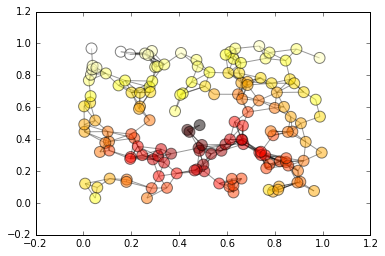

In [102]:
#Exemple

import networkx as nx

# graphe aléatoire
G = nx.random_geometric_graph(150, 0.12) 

pos = nx.get_node_attributes(G, 'pos')
dists = [(x - 0.5)**2 + (y - 0.5)**2 for x, y in pos.values()]
ncenter = np.argmin(dists)


p = nx.single_source_shortest_path_length(G, ncenter)

pylab.figure()
nx.draw_networkx_edges(G, pos, alpha=0.4)
nx.draw_networkx_nodes(G, pos, nodelist=p.keys(),
                    node_size=120, alpha=0.5,
                    node_color=list(p.values()), cmap=pylab.cm.hot)
pylab.show()

## Analyse de données

pandas: surcouche de numpy pour "émuler" R

In [111]:
import pandas as pds

a = pds.DataFrame({'pib':numpy.random.normal(size=5),'pop':5+numpy.random.normal(size=5)})
a

pib       pop
0 -2.093575  4.559647
1 -1.414990  2.517185
2  1.153592  6.061150
3 -0.675449  6.705802
4  0.447830  5.103083

In [112]:
a[a["pib"]>0]

pib       pop
2  1.153592  6.061150
4  0.447830  5.103083

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


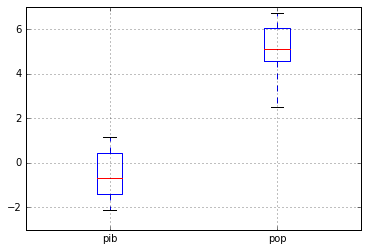

In [121]:
figure = a.boxplot()

## Autres

   - calcul symbolique/calcul formel: SimPy, Sage
   - apprentissage automatique: scikit-learn
   - parallélisme: joblib
   - et autres: https://wiki.python.org/moin/NumericAndScientific
   
"Ten reasons Python rocks for science": 
   https://www.stat.washington.edu/~hoytak/blog/whypython.html